# Genetic Algorithm for Container Storage Space 

Para exemplificar a utilização de algoritimos genéticos para um problema de ótimização, foi feita a
implementação de um algoritimo para determinar o número de frutas de cada tipo que um container
pode carregar de forma a alcançar o maior valor de carregamento, sem ultrapassar o peso máximo de
500 e respeitando o mı́nimo de frutas de 4 unidades.

|Fruit| Weight | Value |
|-----|--------|-------|
|Lemon|2|3|
|Orange|4|3|6|
|Papaya|5|10|
|Pineapple|8|18|
|Watermelon|12|26|

Basic Genetic Algorithm:  
1) Init population  
2) Fitness  
3) Selection  
4) Crossover and mutation  
5) Repeat  

---

In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def initialize(size):
    """ Initialize population
    
    Args:
        size: Size of the population
        
    Returns:
        Numpy matrix with the population
    """
    
    population = np.zeros((size,6)) # 6 Columns: One for each fruit (5 fruits) and the one for the fitness value
    
    for chrom in population:
        chrom[:-1] = np.array(random.sample(range(4, 192), 5)) # Alphabet: 4 (min) to 192
        chrom[-1]  = fitness(chrom[:-1])
        
    return population
    

In [3]:
def fitness(chromosome):
    """ Calculate fitness
    
    Args:
        chromosome: Chromosome to calculate fitness
        
    Returns:
        Calculated fitness
    """
    
    max_weight = 500
    penalty    = 20
    
    weight     = [2, 4, 5, 8, 12]
    value      = [3, 6, 10, 18, 26]
    
    weight_chrom = np.sum(chromosome * weight)
    value_chrom  = np.sum(chromosome * value)
    
    if (weight_chrom <= max_weight):
        fitness = value_chrom
    else:
        fitness = value_chrom - (weight_chrom - max_weight) * penalty
        
    return fitness

In [4]:
def selection(population, tx, k):
    """ Select chromosomes to reproduce using tournament algorithm
    
    Args:
        population : Matrix with all population
        tx         : 
        k          : Tournament size
        
    Return:
        Parents selected to reproduce
    """
    
    size = round(len(population) * tx)
    
    if (size % 2 != 0 or size == 0): 
        size += 1
        
    parents = np.zeros((size,6))
    
    for i in range(0, size):
        better_p = min(population[:,-1])
        for j in range(0, k):
            candidate = random.choice(population)
            if (candidate[-1] >= better_p):
                better_p = candidate[-1]
                select   = candidate

        parents[i] = select
    
    return parents

In [5]:
def crossover(parents):
    """ Create children using single-point crossover
    
    Args:
        parents: Matrix with selected parents
        
    Returns:
        Vector with generated children
    """
    
    children = parents.copy()
    
    for i in range(0, len(children), 2):
        point = int(np.array(random.sample(range(1, 5), 1)))

        # Children 1
        children[i, :point]   = parents[i+1, :point]
        children[i,-1]         = fitness(children[i,:-1])
        
        # Children 2
        children[i+1, :point] = parents[i, :point]
        children[i+1, -1]      = fitness(children[i+1, :-1])
        
    return children

In [6]:
def mutation(population, tx):
    """ Apply mutation
    
    Args:
        population :
        tx         :
    """
    
    n_mutation = round(len(population)*tx)
    
    if (n_mutation < 0): 
        n_mutation = 1
        
    for i in range(0, n_mutation):
        chromosome = random.randint(2, len(population) - 1)
        locus      = random.randint(0, 5)
        
        population[chromosome, locus] = random.randint(4,192)
        population[chromosome, -1]    = fitness(population[chromosome, :-1])
        

In [7]:
gen = 30
pop = initialize(2000)

better = np.zeros(gen)
mean   = np.zeros(gen)

for i in range(0, gen):
    pop          = pop[pop[:,-1].argsort()][::-1] # Sorte in decreasing order
    parents      = selection(pop, 0.4, 3)         # Population, tx, k
    children     = crossover(parents)
    n_keep       = len(pop) - len(children)
    pop[n_keep:] = children
    mutation(pop, 0.4)
    
    better[i]    = pop[0, -1]
    mean[i]      = np.mean(pop[:,-1])
    

pop = pop[pop[:,-1].argsort()][::-1]
print(pop[:5])

[[   7.    5.   14.   36.    9. 1073.]
 [   8.    7.    4.   26.   19. 1068.]
 [  11.    8.   13.   40.    5. 1061.]
 [   7.   11.    7.   40.    7. 1059.]
 [   6.    5.   13.   37.    9. 1058.]]


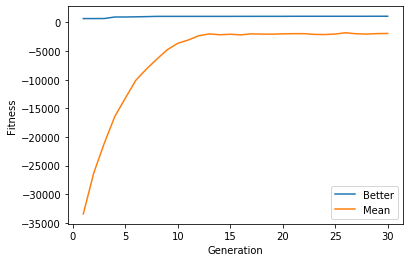

In [8]:
plt.figure()
plt.plot(np.arange(1,gen+1), better, label = 'Better')
plt.plot(np.arange(1,gen+1), mean, label = 'Mean')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()